In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime, timedelta

import config

In [22]:
client = StockHistoricalDataClient(config.API_KEY, config.SECRET_KEY)

In [29]:
symbol = 'SPY'

end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)

In [30]:
request_params = StockBarsRequest(
    symbol_or_symbols=symbol,
    timeframe=TimeFrame.Day,
    start=start_date,
    end=end_date
)

In [31]:
bars = client.get_stock_bars(request_params)

In [32]:
df = pd.DataFrame([{
    'Date': bar.timestamp,
    'Open': bar.open,
    'High': bar.high,
    'Low': bar.low,
    'Close': bar.close,
    'Volume': bar.volume
} for bar in bars[symbol]])

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [33]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-23 05:00:00+00:00,263.18,264.8234,263.0700,263.32,44012132.0
2018-11-26 05:00:00+00:00,265.78,267.7500,265.3400,267.43,81413911.0
2018-11-27 05:00:00+00:00,266.34,268.4000,265.6600,268.29,79161825.0
2018-11-28 05:00:00+00:00,269.60,274.5800,268.3272,274.36,129875459.0
2018-11-29 05:00:00+00:00,273.71,275.5500,272.4300,273.95,83664985.0
...,...,...,...,...,...
2023-11-14 05:00:00+00:00,446.32,450.0600,446.0900,448.73,97176937.0
2023-11-15 05:00:00+00:00,450.11,451.3800,448.8000,449.68,77327573.0
2023-11-16 05:00:00+00:00,449.22,450.5600,448.1200,450.23,66665799.0


<Axes: xlabel='Date', ylabel='Open'>

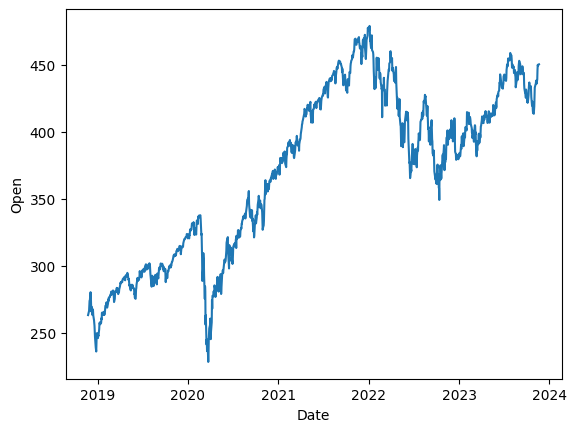

In [34]:
sns.lineplot(df.Open)